## [E-8]NewsShorts

# 8.뉴스 요약봇 만들기


# 목표
---
- ## 텍스트 요약(Text Summarization)기술을 활용해서 긴문장을 짧은 문자으로 만들어라!
    - #### 구글 수많은 정보(페이지만 600억개)중에 우리에게 필요한 정보를 축약해서 본다면 얼마나 좋을까?
    - #### 이 아름다운 기술이 바로 텍스트 요약이다
    - #### 우리에게 시간을 아껴줄 수 있는 기술이다.

|루브릭|
|:-|
|아래의 기준을 바탕으로 프로젝트를 평가합니다.|

---

|평가문항|	상세기준|
|:-|:-|
|1. Abstractive 모델 구성을 위한 텍스트 전처리 단계가 체계적으로 진행되었다.|분석단계, 정제단계, 정규화와 불용어 제거, 데이터셋 분리, 인코딩 과정이 빠짐없이 체계적으로 진행되었다.|
|2. 텍스트 요약모델이 성공적으로 학습되었음을 확인하였다.|모델학습이 안정적으로 수렴되었음을 그래프를 통해 확인하였으며, 실제 요약문과 유사한 요약문장을 얻을 수 있었다.|
|3. Extractive 요약을 시도해 보고 Abstractive 요약 결과과 함께 비교해 보았다.|두 요약 결과를 문법완성도 측면과 핵심단어 포함 측면으로 나누어 비교분석 결과를 제시하였다.|


## 학습 목표
- **Extractive/Abstractive summarization 이해하기**
- **단어장 크기를 줄이는 다양한 text normalization 적용해보기**
- **seq2seq의 성능을 Up시키는 Attention Mechanism 적용하기**

## 8-2. 텍스트 요약(Text Summarization)이란?
![](https://d3s0tskafalll9.cloudfront.net/media/original_images/E-21-1.png)
- #### 텍스트 요약(Text Summarization)이란 위 그림과 같이 긴 길이의 문서(Document) 원문을 핵심 주제만으로 구성된 짧은 요약(Summary) 문장들로 변환
    - #### 뉴스 제목을 만들어내는 것이 텍스트 요약의 대표적인 예
    - #### 예) 네이버 뉴스 서비스에 있는 요약봇 기능 - 추출적 요약
    - #### 중요한 것은 요약 전후에 정보 손실 발생이 최소화되어야 한다는 점  
    

## 텍스트 요약 2가지
1. #### 추출적 요약(Extractive Summarization)
2. #### 추상적 요약(Abstractive Summarization)

# 추출적 요약(Extractive Summarization)
![](https://image.edaily.co.kr/images/photo/files/NP/S/2017/11/PS17112800555.jpg)
- ## 추출적 요약(Extractive Summarization) 예) 네이버 뉴스 서비스에 있는 요약봇 기능
    - #### 딥 러닝보다는 주로 전통적인 머신 러닝 방식에 속하는 텍스트 랭크(TextRank)와 같은 알고리즘을 사용해서 이 방법을 사용
    - #### 문장전체에서 핵심문장 몇개를 꺼내와서 요약문을 만드는 방식
    - #### 단점) 문장들간의 호응이 자연스럽지 않을 수 있다는 점
    
    ![%EC%B6%94%EC%B6%9C%EC%9A%94%EC%95%BD1.png](attachment:%EC%B6%94%EC%B6%9C%EC%9A%94%EC%95%BD1.png)
    "메타버스를 구축하는 건 싸지 않다."

**기사내용**

---
***CNBC는 옛 페이스북인 메타가 지난 2일(현지시간) 발표한 2021년 4분기 실적에 대해 이같이 평가했다.***

---
메타버스의 장미빛 전망과 달리 현실은 냉혹하다는 것이다.

이날 메타는 VR·AR(가상·증강현실) 연구소 '리얼리티 랩스' 부문 실적을 처음으로 공개했는데, 지난해에만 100억달러가 넘는 순손실을 기록했기 때문이다. 메타버스 사업 중심축인 리얼리티 랩스의 순손실 규모는 2019년 45억달러(약 5조원), 2020년 66억2000만달러(약 8조원), 2021년 101억9000만달러(약 12조원)로 연평균 50%씩 급증하는 추세다.

메타는 지난해 10월 사명을 바꿀 정도로 메타버스 사업에 의욕을 나타내고 있지만, 외신들은 메타버스가 메타의 발목을 잡았다고 분석한다. CNBC는 "리얼리티 랩스가 없었다면 지난해 560억 달러 이상의 이익을 냈을 것"이라며 '흥청망청 소비'라고 지적했다.

문제는 메타버스 구현까지 10~15년은 족히 걸리는 가운데, 올해 리얼리티 랩스 손실규모는 더 커질 것이란 점이다. 데이비드 웨너 메타 CFO(최고재무책임자)는 "올해 영업손실이 유의미하게 증가할 것"이라고 예고했으며, 마크 저커버그 CEO 역시 "아직 갈 길이 멀다"며 "방향은 분명하지만 앞으로 갈 길이 완벽히 정의되지 않았다"고 말했다. 이에 메타 주가는 26.39% 급락해 2500억달러(약 300조2000억원) 규모의 시가총액이 증발했다. 미 증시 사상 하루 최대 손실액이다.

고무적인 점은 VR기기 '메타 퀘스트'(구 오큘러스 퀘스트)의 콘텐츠 스토어 매출이 10억달러(약1조2000억원)를 돌파했다는 점이다. 2020년 퀘스트2가 출시되기 직전 콘텐츠 스토어 매출이 1억5000만달러였던 점을 고려하면 단시간 내 비약적으로 성장한 셈이다. 이에 힘입어 리얼리티랩스 매출도 2019년 5억달러, 2020년 11억달러, 2021년 23억달러로 증가추세다. 아직은 전체 매출에서 차지하는 비중이 작지만 메타가 추진하는 메타버스 사업이 조금씩 궤도에 오르고 있다는 방증이다.
지난해 수천억 썼다…한국도 메타버스 '총력전'

메타의 어닝쇼크를 바라보는 국내 IT·게임업계 시선은 복잡하다. 메타버스는 거스를 수 없는 흐름이라는 데 동의하면서도 자칫 공격적인 투자가 부메랑이 돼 돌아올까 우려하는 모습이다.

---
***플랫폼 사업은 수년간의 기술투자가 필요한데, 자칫 이번 일로 메타버스 사업에 대한 시장 기대감이 꺾여 투자가 위축될 수 있다는 지적도 제기된다.***

---
***메타버스가 차세대 플랫폼으로 각광받으면서 국내 IT·게임업계도 관련 투자를 강화하고 있다.***

---
아시아 최대 메타버스 플랫폼 '제페토'를 운영 중인 네이버는 또다른 메타버스 생태계 '아크버스'를 선보인다. 카카오 새 사령탑에 오른 남궁훈 미래이니셔티브 센터장도 골목상권 침해 등 일련의 논란 돌파구로 메타버스를 낙점했다. 그는 "메타버스를 중심으로 기업을 개편해 새 땅을 개척하는 것이 국민 요구와 카카오의 창업정신을 모두 지키는 일"이라고 강조했다.

방준혁 넷마블 의장도 4년 만에 열린 경영전략 발표회(NTP)에서 게임과 메타버스·블록체인을 융합해 '가상을 넘어선 두 번째 현실'을 구현하겠다고 강조했다. 메타버스 사업이 될지 안될지를 재는 시기는 지났다는 게 방 의장의 판단이다. 이미 넷마블은 손자회사 메타버스엔터테인먼트를 설립하고 관련 사업을 추진 중이다. 지난해 메타버스 연계 기업에 3500억원 규모의 투자를 단행한 컴투스 위지윅스튜디오와 함께 '컴투버스'를 준비하고 있다.
"메타버스 시대 올때까지 버텨줄 본업 경쟁력 중요"
다만, 메타버스가 수익성으로 연결되기까진 시간이 필요해 보인다. 2018년 제페토를 출시한 네이버제트 역시 2020년 86억4646만원 매출에 188억9706만원 영업손실을 기록한 게 대표적이다. 지난해 400억원대 매출을 올렸을 것으로 예상되지만 영업손실은 여전해 보인다.

이런 점에서 본업 경쟁력이 메타버스 성패를 가를 것이란 진단도 있다. 본업이 실적을 탄탄히 받쳐줘야 신사업 투자가 가능해서다.

게임업계 한 관계자는 "메타의 주가 급락은 메타버스 사업의 불확실성이라기보단 기존 페이스북의 실적 부진에 기인한 것이 더 크다"라며 "메타버스 사업이 신규 수익창출원이 되기까진 다소 시간이 걸리겠지만 모든 플랫폼 사업엔 선점 효과가 절대적인 만큼, 메타버스에 최적화된 글로벌 게임사를 향한 구애도 계속될 것"이라고 말했다.

IT업계 관계자는 "플랫폼은 5~10년 선투자하고 돈은 나중에 버는 사업인데, 메타는 SNS 수익성이 정체된 상황에서 새로운 사업으로 방향을 전환하다 보니 난국에 처했다"라고 말했다. 이어 "구글 모회사인 알파벳은 이번에 어닝서프라이즈를 기록했는데, SNS와 달리 검색은 유행을 타지 않기 때문"이라며 "장시간의 투자를 받쳐줄 수 있는 환경이 중요하다"고 강조했다.

또다른 관계자는 "PC에서 모바일로 전환했듯 메타버스는 거스를 수 없는 흐름"이라며 "엄청나게 투자했다가 폭삭 망하면 리스크가 클 수 있지만, 현재로서는 단기적인 실적보다는 변화된 세상에 어떻게 적응할 것이냐에 대한 거시적 고민이 더 깊은 단계"라고 귀띔했다.

## 위에 보이는 것 처럼 3문장으로 표시해주거나 3줄로 요약을 해주는 것이 추출적요약이다
# 이렇게 많은 기사 내용 중에서 #*** 핵심 3문장을 뽑아내는 기술 ***

## Q.그럼 추상적 요약은 뭘까요?

### 추상적 요약(Abstractive Summarization)

- #### 원문으로부터 내용이 요약된 새로운 문장을 생성 - 원문에 없던 문장일 수도 있다

- #### 추출요약과 가장 다른 점이기도 한 바로 이것은 새로운 문장을 생성하는 것이다.

- #### 자연어 처리 분야 중 자연어 생성(Natural Language Generation, NLG)의 영역

- #### 추출적 요약은 원문을 구성하는 문장 중 어느 것이 요약문에 들어갈 핵심문장인지를 판별한다는 점에서 문장 분류(Text Classification) 문제로 볼 수 있다

- #### 자연어 생성에서 가장 기본적인 신경망 - RNN

---
장기 의존성(long term dependencies) 문제
RNN은 학습 데이터의 길이가 길어질수록 먼 과거의 정보를 현재에 전달하기 어렵다는 문제가 있습니다. 이 문제를 해결하기 위해 LSTM과 GRU가 등장했고, 이 둘도 부족해서 어텐션(Attention) 메커니즘이 등장

---

RNN을 이용해 Language Generation을 한다고 해서 긴 문장을 읽고 나서 요약문을 뚝딱 만들어내긴 어렵겠죠. ML 분야의 선구자 '구글(Google)'은 자신들의 서비스에 어떤 방식으로 텍스트 요약을 시도했었을까요? 

---
2016년도에 텐서플로우를 활용해서 텍스트 요약

Text summarization with TensorFlow(TensorFlow를 사용한 텍스트 요약)

Extractive and Abstractive summarization


Original Text: Alice and Bob took the train to visit the zoo. They saw a baby giraffe, a lion, and a flock of colorful tropical birds. 
Extractive Summary: Alice and Bob visit the zoo. saw a flock of birds.

원문: 앨리스와 밥은 동물원을 방문하기 위해 기차를 탔다. 그들은 아기 기린, 사자, 그리고 다채로운 열대 새들을 보았다. 
추출 요약: 앨리스와 밥은 동물원을 방문했다. 새떼를 보았다.

---

Q2. 구글에서 텍스트 요약을 위해 시도했던 접근법 중에, 텍스트마이닝 분야의 '역문서빈도(IDF)같은' 지표를 활용해 문서 안에서 중요해 보이는 부분을 추출하고 그걸 요약문에 담는 방식을 썼을 때의 문제점은 무엇이었나요?
A2. 원문에서 발췌하는 방식(Extractive summarization)의 요약 기법은 어색하거나 문법적으로 이상한 결과물을 만드는 문제가 있음


Q3. 구글은 짧은 문장. 요약문을 생성하는 모델을 딥 러닝을 통해 end-to-end로 설계하도록 했어요. 구글이 메일서비스에 적용한 자동 회신(Smart Reply) 기능을 만든 것과 비슷한 딥러닝 기법이기도 한 인코더와 디코더의 구조로 구성된 이 딥 러닝 아키텍처(구조)의 이름은 무엇일까요?

**seq2seq(sequence-to-sequence)**




# 필요한 패키지 설치
- 본격적인 시작

In [4]:
import nltk
nltk.download('stopwords')

import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from bs4 import BeautifulSoup 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
import urllib.request
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')


print('성공')

[nltk_data] Downloading package stopwords to /aiffel/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


성공


# 샘플수 확인

In [5]:
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/sunnysai12345/News_Summary/master/news_summary_more.csv", filename="news_summary_more.csv")
data = pd.read_csv(os.getenv("HOME")+"/aiffel/news_summarization/data/news_summary_more.csv", nrows=100000)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 98401


In [4]:
data.head()

,headlines,text
0,upGrad learner switches to career in ML & Al w...,"Saurav Kant, an alumnus of upGrad and IIIT-B's..."
1,Delhi techie wins free food from Swiggy for on...,Kunal Shah's credit card bill payment platform...
2,New Zealand end Rohit Sharma-led India's 12-ma...,New Zealand defeated India by 8 wickets in the...
3,Aegon life iTerm insurance plan helps customer...,"With Aegon Life iTerm Insurance plan, customer..."
4,"Have known Hirani for yrs, what if MeToo claim...",Speaking about the sexual harassment allegatio...


In [5]:
#랜덤한 15개 샘플 출력
data.sample(15)

,headlines,text
66166,Honeypreet directed aides to upload anti-India...,The SIT has informed Panchkula court that Hone...
18809,Twitter CEO personally taking calls on account...,Twitter CEO Jack Dorsey has been personally ta...
52350,Company makes mechanical watch that pairs with...,Belgian watch manufacturer Ressence has develo...
82892,CBI to give â¹10 lakh for info on missing JNU...,The Central Bureau of Investigation (CBI) on T...
48470,"Just because we're popular, world knows our do...",Actor-comedian Kapil Sharma has said that ever...
14528,I would do very well in boxing match against P...,US President Donald Trump has said that he wou...
68147,"Ukrainian Army warehouse explosions forces 30,...","Over 30,000 people were evacuated following ma..."
81316,Sara is a beautiful bundle of energy: 'Kedarna...,"Abhishek Kapoor, director of Sara Ali Khan's d..."
95399,Prashant Bhushan calls Lord Krishna 'legendary...,"Asserting that Romeo loved just one lady, advo..."
40790,Warner to do million-dollar interview on tampe...,Ex-Australian vice-captain David Warner will r...


In [6]:
data = data[['headlines','text']]
data.head()

#랜덤한 15개 샘플 출력
data.sample(15)

,headlines,text
35347,Karti gets protection till May 2 in Aircel-Max...,A Delhi court on Monday extended interim prote...
78750,Tata Steel looking to acquire firms in RBI's b...,Tata Steel is closely following the insolvency...
81207,19-year-old from US wins lottery twice in a week,Nineteen-year-old Rosa Dominguez from Californ...
3856,Hungry anyone? Deepika on dosa named after her...,Deepika Padukone has shared the picture of a U...
10618,"Virgin Hyperloop One hires new CEO, board chai...",Virgin Hyperloop One on Thursday announced it ...
74700,TTV Dhinakaran meets Sasikala in jail on her b...,AIADMK Amma's deputy chief TTV Dhinakaran on F...
80888,"No red carpets, special towels, sofas: Yogi wa...",UP Chief Minister Yogi Adityanath has banned r...
12415,Won't rest till MP CM thrown out: Ex-minister ...,Weeks after resigning as a Madhya Pradesh Mini...
84959,Malaika shares old pic of herself with her son...,Actress Malaika Arora Khan has shared an old p...
44484,Russian state TV warns 'traitors' against livi...,Russian state television has warned the countr...


# 데이터 전처리

## 중복 샘플과 NULL 값이 존재하는 샘플 제거

---

In [7]:
print('text 열에서 중복을 배제한 유일한 샘플의 수 :', data['text'].nunique())
print('headlines 열에서 중복을 배제한 유일한 샘플의 수 :', data['headlines'].nunique())

text 열에서 중복을 배제한 유일한 샘플의 수 : 98360
headlines 열에서 중복을 배제한 유일한 샘플의 수 : 98280


In [8]:
# inplace=True 를 설정하면 DataFrame 타입 값을 return 하지 않고 data 내부를 직접적으로 바꿉니다
data.drop_duplicates(subset = ['text'], inplace=True)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 98360


In [9]:
print(data.isnull().sum())

headlines    0
text         0
dtype: int64


In [10]:
data.dropna(axis=0, inplace=True)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 98360


# 텍스트 정규화와 불용어 제거

In [11]:
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

print("정규화 사전의 수: ", len(contractions))

정규화 사전의 수:  120


In [12]:
print('불용어 개수 :', len(stopwords.words('english') ))
print(stopwords.words('english'))
print('불용어 처리 한 후 개수',len(contractions))

불용어 개수 : 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 's

In [13]:
# 데이터 전처리 함수
def preprocess_sentence(sentence, remove_stopwords=True):
    sentence = sentence.lower() # 텍스트 소문자화
    sentence = BeautifulSoup(sentence, "lxml").text # <br />, <a href = ...> 등의 html 태그 제거
    sentence = re.sub(r'\([^)]*\)', '', sentence) # 괄호로 닫힌 문자열 (...) 제거 Ex) my husband (and myself!) for => my husband for
    sentence = re.sub('"','', sentence) # 쌍따옴표 " 제거
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) # 약어 정규화
    sentence = re.sub(r"'s\b","", sentence) # 소유격 제거. Ex) roland's -> roland
    sentence = re.sub("[^a-zA-Z]", " ", sentence) # 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
    sentence = re.sub('[m]{2,}', 'mm', sentence) # m이 3개 이상이면 2개로 변경. Ex) ummmmmmm yeah -> umm yeah
    
    # 불용어 제거 (Text)
    if remove_stopwords:
        tokens = ' '.join(word for word in sentence.split() if not word in stopwords.words('english') if len(word) > 1)
    # 불용어 미제거 (Summary)
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    return tokens
print('데이터 전처리, 불용어 제거, 불용어 미제거')

데이터 전처리, 불용어 제거, 불용어 미제거


In [14]:
temp_text = '''Saurav Kant, an alumnus of upGrad and IIIT-B's PG Program in Machine learning and Artificial Intelligence, was a Sr Systems Engineer at Infosys with almost 5 years of work experience. The program and upGrad's 360-degree career support helped him transition to a Data Scientist at Tech Mahindra with 90% salary hike. upGrad's Online Power Learning has powered 3 lakh+ careers.'''
temp_headlines = '''Delhi techie wins free food from Swiggy for one year on CRED'''


print("text: ", preprocess_sentence(temp_text))
print("headlines:", preprocess_sentence(temp_headlines, False))  # 불용어를 제거하지 않습니다.
print('성공')

text:  saurav kant alumnus upgrad iiit pg program machine learning artificial intelligence sr systems engineer infosys almost years work experience program upgrad degree career support helped transition data scientist tech mahindra salary hike upgrad online power learning powered lakh careers
headlines: delhi techie wins free food from swiggy for one year on cred
성공


In [15]:
clean_text = []
# 전체 Text 데이터에 대한 전처리 : 10분 이상 시간이 걸릴 수 있습니다. 
for s in data['text']:
    clean_text.append(preprocess_sentence(s))

# 전처리 후 출력
print("Text 전처리 후 결과: ", clean_text[:5])

print('전체 Text 데이터에 대한 전처리')

Text 전처리 후 결과:  ['saurav kant alumnus upgrad iiit pg program machine learning artificial intelligence sr systems engineer infosys almost years work experience program upgrad degree career support helped transition data scientist tech mahindra salary hike upgrad online power learning powered lakh careers', 'kunal shah credit card bill payment platform cred gave users chance win free food swiggy one year pranav kaushik delhi techie bagged reward spending cred coins users get one cred coin per rupee bill paid used avail rewards brands like ixigo bookmyshow ubereats cult fit', 'new zealand defeated india wickets fourth odi hamilton thursday win first match five match odi series india lost international match rohit sharma captaincy consecutive victories dating back march match witnessed india getting seventh lowest total odi cricket history', 'aegon life iterm insurance plan customers enjoy tax benefits premiums paid save taxes plan provides life cover age years also customers options insur

In [16]:
clean_headlines = []
# 전체 headlines 데이터에 대한 전처리 : 5분 이상 시간이 걸릴 수 있습니다. 
for s in data['headlines']:
    clean_headlines.append(preprocess_sentence(s, False))

print("headlines 전처리 후 결과: ", clean_headlines[:5])

headlines 전처리 후 결과:  ['upgrad learner switches to career in ml al with salary hike', 'delhi techie wins free food from swiggy for one year on cred', 'new zealand end rohit sharma led india match winning streak', 'aegon life iterm insurance plan helps customers save tax', 'have known hirani for yrs what if metoo claims are not true sonam']


In [17]:
data['text'] = clean_text
data['headlines'] = clean_headlines

# 빈 값을 Null 값으로 변환
data.replace('', np.nan, inplace=True)
print('성공')

성공


In [18]:
data.isnull().sum()

headlines    0
text         0
dtype: int64

In [19]:
data.dropna(axis=0, inplace=True)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 98360


텍스트의 최소 길이 : 1
텍스트의 최대 길이 : 60
텍스트의 평균 길이 : 35.09968483123221
요약의 최소 길이 : 1
요약의 최대 길이 : 16
요약의 평균 길이 : 9.299532330215534


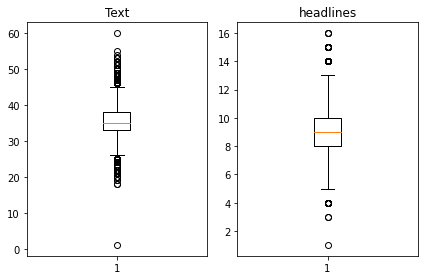

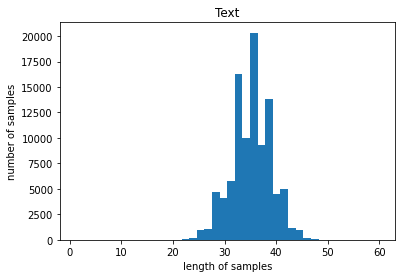

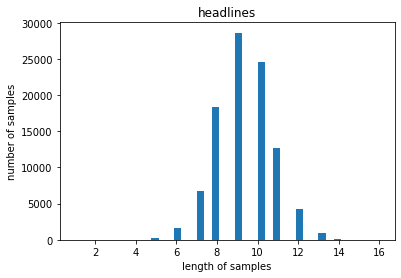

In [20]:
# 길이 분포 출력
import matplotlib.pyplot as plt

text_len = [len(s.split()) for s in data['text']]
headlines_len = [len(s.split()) for s in data['headlines']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('요약의 최소 길이 : {}'.format(np.min(headlines_len)))
print('요약의 최대 길이 : {}'.format(np.max(headlines_len)))
print('요약의 평균 길이 : {}'.format(np.mean(headlines_len)))

plt.subplot(1,2,1)
plt.boxplot(text_len)
plt.title('Text')
plt.subplot(1,2,2)
plt.boxplot(headlines_len)
plt.title('headlines')
plt.tight_layout()
plt.show()

plt.title('Text')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('headlines')
plt.hist(headlines_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [21]:
text_max_len = 50
headlines_max_len = 8
print('성공')

성공


In [22]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s.split()) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))
print('성공')

성공


In [23]:
below_threshold_len(text_max_len, data['text'])
below_threshold_len(headlines_max_len,  data['headlines'])

전체 샘플 중 길이가 50 이하인 샘플의 비율: 0.9998576657177715
전체 샘플 중 길이가 8 이하인 샘플의 비율: 0.2755693371289142


In [24]:
data = data[data['text'].apply(lambda x: len(x.split()) <= text_max_len)]
data = data[data['headlines'].apply(lambda x: len(x.split()) <= headlines_max_len)]
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 27105


In [25]:
# 요약 데이터에는 시작 토큰과 종료 토큰을 추가한다.
data['decoder_input'] = data['headlines'].apply(lambda x : 'sostoken '+ x)
data['decoder_target'] = data['headlines'].apply(lambda x : x + ' eostoken')
data.head()

,headlines,text,decoder_input,decoder_target
19,odisha cm patnaik controls mining mafia union ...,union minister dharmendra pradhan wednesday cl...,sostoken odisha cm patnaik controls mining maf...,odisha cm patnaik controls mining mafia union ...
21,isro unveils bengaluru centre for manned space...,indian space research organisation wednesday u...,sostoken isro unveils bengaluru centre for man...,isro unveils bengaluru centre for manned space...
22,killed injured in saudi arabia floods,least people killed others injured saudi arabi...,sostoken killed injured in saudi arabia floods,killed injured in saudi arabia floods eostoken
29,seat cushions from missing plane carrying foot...,investigators searching lost plane carrying ar...,sostoken seat cushions from missing plane carr...,seat cushions from missing plane carrying foot...
36,agustawestland scam accused rajiv saxena extra...,agustawestland chopper scam co accused rajiv s...,sostoken agustawestland scam accused rajiv sax...,agustawestland scam accused rajiv saxena extra...


In [26]:
encoder_input = np.array(data['text']) # 인코더의 입력
decoder_input = np.array(data['decoder_input']) # 디코더의 입력
decoder_target = np.array(data['decoder_target']) # 디코더의 레이블
print('성공')

성공


In [27]:
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print(indices)

[15036  7932  9157 ... 16907  6398 13749]


In [28]:
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]
print('성공')

성공


In [29]:
n_of_val = int(len(encoder_input)*0.2)
print('테스트 데이터의 수 :', n_of_val)

테스트 데이터의 수 : 5421


In [30]:
encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

훈련 데이터의 개수 : 21684
훈련 레이블의 개수 : 21684
테스트 데이터의 개수 : 5421
테스트 레이블의 개수 : 5421


In [31]:
src_tokenizer = Tokenizer() # 토크나이저 정의
src_tokenizer.fit_on_texts(encoder_input_train) # 입력된 데이터로부터 단어 집합 생성
print('성공')

성공


In [32]:
threshold = 7
total_cnt = len(src_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 42499
등장 빈도가 6번 이하인 희귀 단어의 수: 30740
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 11759
단어 집합에서 희귀 단어의 비율: 72.3311136732629
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 8.263353736838162


In [33]:
src_vocab = 10000
src_tokenizer = Tokenizer(num_words=src_vocab) # 단어 집합의 크기를 10,000으로 제한
src_tokenizer.fit_on_texts(encoder_input_train) # 단어 집합 재생성
print('성공')

성공


In [34]:
# 텍스트 시퀀스를 정수 시퀀스로 변환
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train) 
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)

# 잘 진행되었는지 샘플 출력
print(encoder_input_train[:3])

[[458, 529, 48, 2739, 4185, 2154, 197, 853, 3522, 1660, 1600, 51, 1, 503, 18, 561, 694, 641, 2961, 247, 320, 6465, 152, 102, 64, 3452, 1449, 443, 358, 1601], [193, 79, 57, 131, 600, 4514, 1539, 203, 687, 426, 268, 181, 6466, 175, 648, 550, 3771, 5788, 1, 70, 200, 4514, 5081, 87, 301, 869, 6466, 175, 1882], [4931, 985, 421, 3324, 159, 735, 688, 2464, 7047, 427, 321, 178, 1145, 5082, 274, 3862, 100, 297, 334, 985, 421, 231, 211, 339, 2693, 695]]


In [35]:
tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(decoder_input_train)
print('성공')

성공


In [36]:
threshold = 6
total_cnt = len(tar_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 18906
등장 빈도가 5번 이하인 희귀 단어의 수: 14287
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 4619
단어 집합에서 희귀 단어의 비율: 75.56860256003385
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 14.195732534994393


In [37]:
tar_vocab = 2000
tar_tokenizer = Tokenizer(num_words=tar_vocab) 
tar_tokenizer.fit_on_texts(decoder_input_train)
tar_tokenizer.fit_on_texts(decoder_target_train)

# 텍스트 시퀀스를 정수 시퀀스로 변환
decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train) 
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

# 잘 변환되었는지 확인
print('input')
print('input ',decoder_input_train[:5])
print('target')
print('decoder ',decoder_target_train[:5])

input
input  [[1, 188, 592, 63, 6, 286], [1, 109, 1126, 165, 264, 3], [1, 1949, 1127, 533, 10, 306, 419], [1, 1826, 909, 3, 1606, 166, 1382, 112, 65], [1, 4, 1037, 1950, 404, 35]]
target
decoder  [[188, 592, 63, 6, 286, 2], [109, 1126, 165, 264, 3, 2], [1949, 1127, 533, 10, 306, 419, 2], [1826, 909, 3, 1606, 166, 1382, 112, 65, 2], [4, 1037, 1950, 404, 35, 2]]


In [38]:
drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]

print('삭제할 훈련 데이터의 개수 :', len(drop_train))
print('삭제할 테스트 데이터의 개수 :', len(drop_test))

encoder_input_train = [sentence for index, sentence in enumerate(encoder_input_train) if index not in drop_train]
decoder_input_train = [sentence for index, sentence in enumerate(decoder_input_train) if index not in drop_train]
decoder_target_train = [sentence for index, sentence in enumerate(decoder_target_train) if index not in drop_train]

encoder_input_test = [sentence for index, sentence in enumerate(encoder_input_test) if index not in drop_test]
decoder_input_test = [sentence for index, sentence in enumerate(decoder_input_test) if index not in drop_test]
decoder_target_test = [sentence for index, sentence in enumerate(decoder_target_test) if index not in drop_test]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

삭제할 훈련 데이터의 개수 : 8
삭제할 테스트 데이터의 개수 : 3
훈련 데이터의 개수 : 21676
훈련 레이블의 개수 : 21676
테스트 데이터의 개수 : 5418
테스트 레이블의 개수 : 5418


# 패딩하기

In [39]:
encoder_input_train = pad_sequences(encoder_input_train, maxlen=text_max_len, padding='post')
encoder_input_test = pad_sequences(encoder_input_test, maxlen=text_max_len, padding='post')
decoder_input_train = pad_sequences(decoder_input_train, maxlen=headlines_max_len, padding='post')
decoder_target_train = pad_sequences(decoder_target_train, maxlen=headlines_max_len, padding='post')
decoder_input_test = pad_sequences(decoder_input_test, maxlen=headlines_max_len, padding='post')
decoder_target_test = pad_sequences(decoder_target_test, maxlen=headlines_max_len, padding='post')
print('성공')

성공


# 전처리 끝!

# 8-8. 모델 설계하기

In [40]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# 인코더 설계 시작
embedding_dim = 128
hidden_size = 256

# 인코더
encoder_inputs = Input(shape=(text_max_len,))

# 인코더의 임베딩 층
enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)

# 인코더의 LSTM 1
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 인코더의 LSTM 3
encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

In [41]:
# 디코더 설계
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.2)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

In [42]:
# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs) 

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 50, 128)      1024000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 50, 256), (N 394240      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
______________________________________________________________________________________________

# 모델 훈련 하기

In [43]:
from tensorflow.keras.layers import AdditiveAttention

# 어텐션 층(어텐션 함수)
attn_layer = AdditiveAttention(name='attention_layer')

# 인코더와 디코더의 모든 time step의 hidden state를 어텐션 층에 전달하고 결과를 리턴
attn_out = attn_layer([decoder_outputs, encoder_outputs])


# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 50, 128)      1024000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 50, 256), (N 394240      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
____________________________________________________________________________________________

In [44]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
history = model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, \
          validation_data=([encoder_input_test, decoder_input_test], decoder_target_test), \
          batch_size=256, callbacks=[es], epochs=50)

Epoch 1/50
85/85 [==============================] - 65s 664ms/step - loss: 4.9344 - val_loss: 4.5616
Epoch 2/50
85/85 [==============================] - 56s 655ms/step - loss: 4.5354 - val_loss: 4.3358
Epoch 3/50
85/85 [==============================] - 56s 655ms/step - loss: 4.3526 - val_loss: 4.2056
Epoch 4/50
85/85 [==============================] - 56s 660ms/step - loss: 4.1972 - val_loss: 4.0681
Epoch 5/50
85/85 [==============================] - 58s 680ms/step - loss: 4.0549 - val_loss: 3.9546
Epoch 6/50
85/85 [==============================] - 56s 664ms/step - loss: 3.9251 - val_loss: 3.8835
Epoch 7/50
85/85 [==============================] - 56s 654ms/step - loss: 3.8038 - val_loss: 3.7814
Epoch 8/50
85/85 [==============================] - 56s 656ms/step - loss: 3.6792 - val_loss: 3.6992
Epoch 9/50
85/85 [==============================] - 55s 645ms/step - loss: 3.5639 - val_loss: 3.6295
Epoch 10/50
85/85 [==============================] - 55s 649ms/step - loss: 3.4592 - val_lo

# 시각화

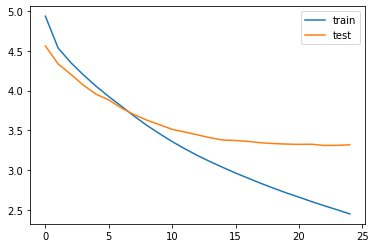

In [45]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# 모델 테스트하기

In [46]:
src_index_to_word = src_tokenizer.index_word # 원문 단어 집합에서 정수 -> 단어를 얻음
tar_word_to_index = tar_tokenizer.word_index # 요약 단어 집합에서 단어 -> 정수를 얻음
tar_index_to_word = tar_tokenizer.index_word # 요약 단어 집합에서 정수 -> 단어를 얻음

print('성공')

성공


In [47]:
# 인코더 설계
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)

# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

print('성공')

성공


In [48]:
# 어텐션 함수
decoder_hidden_state_input = Input(shape=(text_max_len, hidden_size))
attn_out_inf = attn_layer([decoder_outputs2, decoder_hidden_state_input])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat) 

# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

print('성공')

성공


In [49]:
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    e_out, e_h, e_c = encoder_model.predict(input_seq)

     # <SOS>에 해당하는 토큰 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index['sostoken']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition: # stop_condition이 True가 될 때까지 루프 반복

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word[sampled_token_index]

        if (sampled_token!='eostoken'):
            decoded_sentence += ' '+sampled_token

        #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_token == 'eostoken'  or len(decoded_sentence.split()) >= (headlines_max_len-1)):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 상태를 업데이트 합니다.
        e_h, e_c = h, c

    return decoded_sentence
print('성공')

성공


# 추상적 요약

In [50]:
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if (i!=0):
            temp = temp + src_index_to_word[i]+' '
    return temp

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2summary(input_seq):
    temp=''
    for i in input_seq:
        if ((i!=0 and i!=tar_word_to_index['sostoken']) and i!=tar_word_to_index['eostoken']):
            temp = temp + tar_index_to_word[i] + ' '
    return temp

print('성공')

성공


In [51]:
for i in range(50, 100):
    print("원문 :", seq2text(encoder_input_test[i]))
    print("실제 요약 :", seq2summary(decoder_input_test[i]))
    print("예측 요약 :", decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print("\n")

원문 : woman sued airbnb negligence allowing rent los angeles room host previously accused domestic violence alleged carlos listed positive reviews sexually assaulted airbnb said conducted background check allowed host convicted 
실제 요약 : woman sexually by sues 
예측 요약 :  woman woman denied denied


원문 : founder amit bhardwaj allegedly people crore arrested bangkok brought back pune allegedly scheme bhardwaj monthly returns bhardwaj previously worked infosys started cryptocurrency mining company gb also launched token 
실제 요약 : cr bitcoin amit arrested in 
예측 요약 :  crore in bitcoin


원문 : minister state finance shiv pratap shukla said proposal government consideration ban notes introduced demonetisation november shukla said notes circulated adequate numbers wake currency crunch various states past months 
실제 요약 : no plans to finance 
예측 요약 :  gst of demonetisation chidambaram


원문 : delhi government tuesday announced merit means scholarship students low middle income groups studying state u

# 8-12. 추출적 요약 해보기

# summarize 사용하기

Summa의 summarize()의 인자로 사용되는 값들에 대해서 알아볼게요.
>text (str) : 요약할 테스트.
>
>ratio (float, optional) – 요약문에서 원본에서 선택되는 문장 비율. 0~1 사이값
>
>words (int or None, optional) – 출력에 포함할 단어 수.
>
>만약, ratio와 함께 두 파라미터가 모두 제공되는 경우 ratio는 무시한다.
>
>split (bool, optional) – True면 문장 list / False는 조인(join)된 문자열을 반환

In [9]:
import requests
from summa.summarizer import summarize

In [10]:
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/sunnysai12345/News_Summary/master/news_summary_more.csv", filename="news_summary_more.csv")
data = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')

In [11]:
text = data

In [12]:
print(text[:1500])

                                              headlines  \
0     upGrad learner switches to career in ML & Al w...   
1     Delhi techie wins free food from Swiggy for on...   
2     New Zealand end Rohit Sharma-led India's 12-ma...   
3     Aegon life iTerm insurance plan helps customer...   
4     Have known Hirani for yrs, what if MeToo claim...   
...                                                 ...   
1495  Have seen Sachin Tendulkar get angry but not M...   
1496  Player ensures wife stays dry in rain during A...   
1497  Federer denied entry into locker room by secur...   
1498  42/42 seats in West Bengal: CM Mamata's cutout...   
1499  Court refuses chargesheet by Delhi Police agai...   

                                                   text  
0     Saurav Kant, an alumnus of upGrad and IIIT-B's...  
1     Kunal Shah's credit card bill payment platform...  
2     New Zealand defeated India by 8 wickets in the...  
3     With Aegon Life iTerm Insurance plan, customer...  
4

In [19]:
for i in range(0, 10):
    print("원문 :", text['text'][i])
    print("실제 요약 :", text['headlines'][i])
    print("추출 요약 :", summarize(text["text"][i], ratio=0.5))
    print("\n")

원문 : Saurav Kant, an alumnus of upGrad and IIIT-B's PG Program in Machine learning and Artificial Intelligence, was a Sr Systems Engineer at Infosys with almost 5 years of work experience. The program and upGrad's 360-degree career support helped him transition to a Data Scientist at Tech Mahindra with 90% salary hike. upGrad's Online Power Learning has powered 3 lakh+ careers.
실제 요약 : upGrad learner switches to career in ML & Al with 90% salary hike
추출 요약 : upGrad's Online Power Learning has powered 3 lakh+ careers.


원문 : Kunal Shah's credit card bill payment platform, CRED, gave users a chance to win free food from Swiggy for one year. Pranav Kaushik, a Delhi techie, bagged this reward after spending 2000 CRED coins. Users get one CRED coin per rupee of bill paid, which can be used to avail rewards from brands like Ixigo, BookMyShow, UberEats, Cult.Fit and more.
실제 요약 : Delhi techie wins free food from Swiggy for one year on CRED
추출 요약 : Users get one CRED coin per rupee of bill pai

In [23]:
for i in range(0, 10):
    print("원문 :", text['text'][i])
    print("실제 요약 :", text['headlines'][i])
    print("추출 요약 :", summarize(text['text'][i], ratio=0.6))
    print("\n")

원문 : Saurav Kant, an alumnus of upGrad and IIIT-B's PG Program in Machine learning and Artificial Intelligence, was a Sr Systems Engineer at Infosys with almost 5 years of work experience. The program and upGrad's 360-degree career support helped him transition to a Data Scientist at Tech Mahindra with 90% salary hike. upGrad's Online Power Learning has powered 3 lakh+ careers.
실제 요약 : upGrad learner switches to career in ML & Al with 90% salary hike
추출 요약 : upGrad's Online Power Learning has powered 3 lakh+ careers.


원문 : Kunal Shah's credit card bill payment platform, CRED, gave users a chance to win free food from Swiggy for one year. Pranav Kaushik, a Delhi techie, bagged this reward after spending 2000 CRED coins. Users get one CRED coin per rupee of bill paid, which can be used to avail rewards from brands like Ixigo, BookMyShow, UberEats, Cult.Fit and more.
실제 요약 : Delhi techie wins free food from Swiggy for one year on CRED
추출 요약 : Users get one CRED coin per rupee of bill pai

# 회고
**ratio (float, optional) – 요약문에서 원본에서 선택되는 문장 비율. 0~1 사이값**

ratio를 너무 낮게 설정했더니 추출요약이 계속 안 나왔다
그래서 코드를 계속 문제점이 어떤 건지 찾아다녔다.
수많은 시간을 썼다.

그런데
ratio설정값과 코드를 몇가지 바꾸고 하니 설정값을 0.4 or 0.45이하로 하니깐 추출요약이 나오지 않고 생략되는 부분들이 생겼다.
그래서 0.5이상으로 설정값을 변경하니 추출요약이 나왔다.
원문의 문장 비율이 안 맞아서 그런것 같다.

추출요약이 나오는 순간 환호를 질렀다.얏호